<a href="https://colab.research.google.com/github/WPNJoherrera/DATA-ANALYTICS/blob/Proyectos/Pry02JoHerrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto No 02 Alumno: Jose A. Herrera Sancho

#Preliminar Ambiente

##Llamado a las librerias de Phyton

In [ ]:

## +++++++++++++++++++++++++++++++++++++++++*
## Importo las librerias de trabajo
## +++++++++++++++++++++++++++++++++++++++++*

import pandas as pd
import math as cmath


## Subir el Archivo de Trabajo

In [ ]:
## +++++++++++++++++++++++++++++++++++++++++*
## Set mi Google Drive, Donde tengo los datos
## +++++++++++++++++++++++++++++++++++++++++*

from google.colab import drive
drive.mount('/content/ProyectoNo02-Data/', force_remount=True)


In [ ]:
## +++++++++++++++++++++++++++++++++++++++++*
## Leo mi set datos autos.csv
## Muestro la data de verificación.
## +++++++++++++++++++++++++++++++++++++++++*


dfAutosOri = pd.read_csv('/content/ProyectoNo02-Data/MyDrive/Data & Analitics (Phyton Machine Learning)/Data/autos.csv', sep=';')
dfAutos = dfAutosOri.copy(deep=True)


In [ ]:
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB



#Ejercicio No 1

Generar una función y utilizar esta para recodificar la variable “país de
origen” (1, 2, 3) en el dataframe a través de la función apply.

In [ ]:
#para saber como recodificar la columna: país de origen con 1,2,3...
#se debe saber cuantos tipos de pais son.


dfAutos.groupby("Pais_Origen").count()

#Con Base en la agrupación, se obtiene, que los paises son: USA (249), Japan (79), Europe (70)
#en ese orden se le asigna el valor: 1,2,3



,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
Pais_Origen,,,,,,,,
Europe,70,73,73,73,73,73,73,71
Japan,79,79,79,79,79,79,79,79
USA,249,254,254,254,254,254,254,250


##Creación de la funcion: recodificarPais()

In [ ]:
#
# Creacion de la funcion
#

def recodificarPais( namePais):
  ''' >
  Function: recodificarPais()

  Recive un parametro, con el nombre de país.
  El valor es evaluado y retorna el codigo asignado.
  < '''
  vReturn = ''

  if namePais == "USA":
    vReturn = 1

  if namePais == "Japan":
    vReturn = 2

  if namePais == "Europe":
    vReturn = 3

  return vReturn

dfAutos["Pais_Origen"] = dfAutos.apply( lambda x: recodificarPais( namePais=x["Pais_Origen"] ) , axis=1)

dfAutos


#Ejercicio No 2
Generar 5 nuevas variables aplicando los siguientes criterios con las
variables numéricas:

1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200

3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1
6. var1/var2**2

##Limpieza y tratamiento de las variables (Según corresponda)

##Busqueda Incosistencias

###Verificacion de datos perdidos de origen.

In [ ]:
dfAutos.isnull().sum()



##'''
##Millas_Por_Galon     8 Datos Perdidos
##Cilindros            0
##Pais_Origen          0
##Peso_En_Libras       0
##Desplazamiento       0
##Aceleracion          0
##Nombre               0
##Anyo                 0
##Caballo_De_Fuerza    6 Datos Perdidos
##'''

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,3,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,1,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,1,2625,120.0,18.6,ford ranger,1/01/1982,79.0


### Cargamos la herramienta de imputacion

In [ ]:
from sklearn.impute import KNNImputer ## Como se encontro datos perdidos
                                      ## Se procede a traer la herramienta de imputacion


In [ ]:

dfAutosTemp = dfAutos.loc[:,['Millas_Por_Galon', 'Cilindros', 'Peso_En_Libras','Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']]
dfAutosTemp.head(6)




,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
0,18.0,8,3504,307.0,12.0,130.0
1,15.0,8,3693,350.0,11.5,165.0
2,18.0,8,3436,318.0,11.0,150.0
3,16.0,8,3433,304.0,12.0,150.0
4,17.0,8,3449,302.0,10.5,140.0
5,15.0,8,4341,429.0,10.0,198.0


In [ ]:
DT_Imputacion = KNNImputer(n_neighbors=2)
dfAutosTempIp = DT_Imputacion.fit_transform( dfAutosTemp)
dfAutosTempIp

array([[  18. ,    8. , 3504. ,  307. ,   12. ,  130. ],
       [  15. ,    8. , 3693. ,  350. ,   11.5,  165. ],
       [  18. ,    8. , 3436. ,  318. ,   11. ,  150. ],
       ...,
       [  32. ,    4. , 2295. ,  135. ,   11.6,   84. ],
       [  28. ,    4. , 2625. ,  120. ,   18.6,   79. ],
       [  31. ,    4. , 2720. ,  119. ,   19.4,   82. ]])

In [ ]:
#Pasamos del array imputado a un DataFrame

dfAutosTempIp = pd.DataFrame( data=dfAutosTempIp
                              , columns=['Millas_Por_Galon', 'Cilindros', 'Peso_En_Libras','Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']
                              )

dfAutosTempIp

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
0,18.0,8.0,3504.0,307.0,12.0,130.0
1,15.0,8.0,3693.0,350.0,11.5,165.0
2,18.0,8.0,3436.0,318.0,11.0,150.0
3,16.0,8.0,3433.0,304.0,12.0,150.0
4,17.0,8.0,3449.0,302.0,10.5,140.0
...,...,...,...,...,...,...
401,27.0,4.0,2790.0,140.0,15.6,86.0
402,44.0,4.0,2130.0,97.0,24.6,52.0
403,32.0,4.0,2295.0,135.0,11.6,84.0
404,28.0,4.0,2625.0,120.0,18.6,79.0


In [ ]:
#Verificamos las celdas vacias.
#Ya se muestra sin valores perdidos.
#En este dtF, tenemos todos los valores numericos

dfAutosTempIpEj03 = dfAutosTempIp.copy(deep=True)
dfAutosTempIp.isnull().sum()



Millas_Por_Galon     0
Cilindros            0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Caballo_De_Fuerza    0
dtype: int64

##1.Log10(var1/var2)

In [ ]:
def usfLog10( var1,var2 ):
  ''' >
  Function: usfLog10()

  Recive dos parametros para realizar el calculo log10()
  Retorna ese valor
  < '''
  vReturn = -1
  vReturn = cmath.log10(var1/var2)

  return vReturn


dfAutosTempIp["ConsumoLog10()"] = dfAutosTempIp.apply( lambda x: usfLog10( var1=x["Millas_Por_Galon"], var2=x["Cilindros"] ) , axis=1)

dfAutosTempIp

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza,ConsumoLog10()
0,18.0,8.0,3504.0,307.0,12.0,130.0,0.352183
1,15.0,8.0,3693.0,350.0,11.5,165.0,0.273001
2,18.0,8.0,3436.0,318.0,11.0,150.0,0.352183
3,16.0,8.0,3433.0,304.0,12.0,150.0,0.301030
4,17.0,8.0,3449.0,302.0,10.5,140.0,0.327359
...,...,...,...,...,...,...,...
401,27.0,4.0,2790.0,140.0,15.6,86.0,0.829304
402,44.0,4.0,2130.0,97.0,24.6,52.0,1.041393
403,32.0,4.0,2295.0,135.0,11.6,84.0,0.903090
404,28.0,4.0,2625.0,120.0,18.6,79.0,0.845098


##2.Sqrt(var1)*exp(var2)/200

In [ ]:
def usfSqrt( var1,var2 ):
  ''' >
  Function: usfSqrt()

  Recive dos parametros para realizar el calculo Sqrt()
  Retorna ese valor

  < '''
  vReturn = -1
  vReturn = cmath.sqrt(var1)*cmath.exp(var2)/200

  return vReturn


dfAutosTempIp["PotenciaSqrt()"] = dfAutosTempIp.apply( lambda x: usfSqrt( var1=x["Aceleracion"], var2=x["Caballo_De_Fuerza"] ) , axis=1)

dfAutosTempIp

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza,ConsumoLog10(),PotenciaSqrt()
0,18.0,8.0,3504.0,307.0,12.0,130.0,0.352183,4.975575e+54
1,15.0,8.0,3693.0,350.0,11.5,165.0,0.273001,7.725177e+69
2,18.0,8.0,3436.0,318.0,11.0,150.0,0.352183,2.311206e+63
3,16.0,8.0,3433.0,304.0,12.0,150.0,0.301030,2.413976e+63
4,17.0,8.0,3449.0,302.0,10.5,140.0,0.327359,1.025161e+59
...,...,...,...,...,...,...,...,...
401,27.0,4.0,2790.0,140.0,15.6,86.0,0.829304,4.414258e+35
402,44.0,4.0,2130.0,97.0,24.6,52.0,1.041393,9.500591e+20
403,32.0,4.0,2295.0,135.0,11.6,84.0,0.903090,5.151521e+34
404,28.0,4.0,2625.0,120.0,18.6,79.0,0.845098,4.395320e+32


##3.Si var 1 > var 2 → 5, caso contrario 3

In [ ]:
def usfCondIf( var1,var2 ):
  ''' >
  Function: usfCondIf()

  Recive dos parametros para realizar el calculo Condificional If.
  Retorna ese valor

  < '''
  vReturn = -1

  if var1>var2:
    vReturn = 5
  else :
    vReturn = 3

  return vReturn


dfAutosTempIp["GastoCombustibleIf"] = dfAutosTempIp.apply(
          lambda x: usfCondIf( var1=x["Millas_Por_Galon"], var2=x["Aceleracion"] )
          , axis=1)

dfAutosTempIp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Millas_Por_Galon    406 non-null    float64
 1   Cilindros           406 non-null    float64
 2   Peso_En_Libras      406 non-null    float64
 3   Desplazamiento      406 non-null    float64
 4   Aceleracion         406 non-null    float64
 5   Caballo_De_Fuerza   406 non-null    float64
 6   ConsumoLog10()      406 non-null    float64
 7   PotenciaSqrt()      406 non-null    float64
 8   GastoCombustibleIf  406 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 28.7 KB


##4.1/logn(var1/var2)*100

In [ ]:
def usfCol4( var1,var2 ):
  ''' >
  Function: usfCol4()

  Recive dos parametros para realizar el calculo.
  Retorna ese valor

  < '''

  try:
    if (var1 > 0) and (var2 > 0):
       vReturn = 1/cmath.log(var1/var2)*100
  except:
    vReturn = -1

  return vReturn


dfAutosTempIp["Col4"] = dfAutosTempIp.apply(
          lambda x: usfCol4( var1=x["Millas_Por_Galon"], var2=x["Aceleracion"] )
          , axis=1)

dfAutosTempIp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Millas_Por_Galon    406 non-null    float64
 1   Cilindros           406 non-null    float64
 2   Peso_En_Libras      406 non-null    float64
 3   Desplazamiento      406 non-null    float64
 4   Aceleracion         406 non-null    float64
 5   Caballo_De_Fuerza   406 non-null    float64
 6   ConsumoLog10()      406 non-null    float64
 7   PotenciaSqrt()      406 non-null    float64
 8   GastoCombustibleIf  406 non-null    int64  
 9   Col4                406 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 31.8 KB


##5.var2**2/var1

In [ ]:
def usfCol5( var1,var2 ):
  ''' >
  Function: usfCol5()

  Recive dos parametros para realizar el calculo.
  Retorna ese valor

  < '''

  try:
    vReturn = var2**2/var1
  except:
    vReturn = -1

  return vReturn


dfAutosTempIp["Col5"] = dfAutosTempIp.apply(
          lambda x: usfCol5( var1=x["Millas_Por_Galon"], var2=x["Aceleracion"] )
          , axis=1)

dfAutosTempIp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Millas_Por_Galon    406 non-null    float64
 1   Cilindros           406 non-null    float64
 2   Peso_En_Libras      406 non-null    float64
 3   Desplazamiento      406 non-null    float64
 4   Aceleracion         406 non-null    float64
 5   Caballo_De_Fuerza   406 non-null    float64
 6   ConsumoLog10()      406 non-null    float64
 7   PotenciaSqrt()      406 non-null    float64
 8   GastoCombustibleIf  406 non-null    int64  
 9   Col4                406 non-null    float64
 10  Col5                406 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 35.0 KB


##6.var1/var2**2

In [ ]:
def usfCol6( var1,var2 ):
  ''' >
  Function: usfCol6()

  Recive dos parametros para realizar el calculo.
  Retorna ese valor

  < '''

  try:
      vReturn = var1/var2**2
  except:
      vReturn = -1

  return vReturn


dfAutosTempIp["Col6"] = dfAutosTempIp.apply(
          lambda x: usfCol6( var1=x["Millas_Por_Galon"], var2=x["Aceleracion"] )
          , axis=1)

dfAutosTempIp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Millas_Por_Galon    406 non-null    float64
 1   Cilindros           406 non-null    float64
 2   Peso_En_Libras      406 non-null    float64
 3   Desplazamiento      406 non-null    float64
 4   Aceleracion         406 non-null    float64
 5   Caballo_De_Fuerza   406 non-null    float64
 6   ConsumoLog10()      406 non-null    float64
 7   PotenciaSqrt()      406 non-null    float64
 8   GastoCombustibleIf  406 non-null    int64  
 9   Col4                406 non-null    float64
 10  Col5                406 non-null    float64
 11  Col6                406 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 38.2 KB


#Ejercicio No 3
Crear una función que permita generar 3 variables cualitativas
ordinales a partir de las variables numéricas.

In [ ]:
def usfEjer03( refValue: float, vmean: float, vstd: float):
  """
  #Función: usfEjer03
  Recibe tres valores:
    refValue : Valor a evaluar.
    vmean: Media de los valores de la columna dataframe
    vstd: Variacion Standard de los valores de la columna dataframe

  """

  vReturn =''

  vAlto = ( vmean + ( 1 * vstd ))
  vBajo = ( vmean - ( 1 * vstd ))


  if refValue > vAlto:
    vReturn = 'Alto'

  if refValue >= vBajo and refValue <= vAlto:
    vReturn = 'Medio'

  if refValue < vBajo:
    vReturn = 'Bajo'

  return vReturn


## Llamado a la funcion clasificadora
## Calculo de los valores previo,para pasarlos como argumentos constantes.

pStd = dfAutosTempIpEj03[ 'Peso_En_Libras'].std()
pMean = dfAutosTempIpEj03[ 'Peso_En_Libras'].mean( )

dfAutosTempIpEj03["Clasifica"] = dfAutosTempIpEj03.apply(
          lambda x: usfEjer03( refValue=x["Peso_En_Libras"],
                               vmean=pMean,
                               vstd=pStd
                             )
          , axis=1)

dfAutosTempIpEj03.groupby("Clasifica").count()


,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
Clasifica,,,,,,
Alto,82,82,82,82,82,82
Bajo,76,76,76,76,76,76
Medio,248,248,248,248,248,248


#Ejercicio No 4
Crear una función en Python que muestre los siguientes gráficos
(simultáneamente) para las variables numéricas, según una variable
cualitativa:

❖ Cajas y bigotes
❖ Barras de la media
❖ Histograma con densidad (Curva)

● La función debe contar con su respectiva documentación.

##Llamado de las librerias Graficas.


In [ ]:
!pip install missingno


import pandas as pd

import numpy as np

from scipy import stats
import missingno as msno

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

##Carga del set datos.

In [ ]:
dfAutos04 = dfAutosOri.copy(deep=True)
dfAutos04.info()
dfAutos04


In [ ]:
## Para uso de las graficas se extrae el año desde el campo
## anio que contiene la fecha
## Antes se debe de transforma a tipo fecha.
## y despues extraer en una nueva columna el año.

dfAutos04['Anyo'] = pd.to_datetime( dfAutos04['Anyo'] )

dfAutos04["DTYear"] = dfAutos04['Anyo'].dt.year

##dfAutos04["DTYear"] = dfAutos04['DTYear'].astype(str)

## Obtiene los nombres de las columnas.

col_num = dfAutos04.select_dtypes(include=['float64', 'int']).columns
col_Str = dfAutos04.select_dtypes(include=['object' ]).columns

dfAutos04



##Creación de la funcion:(graficos_violin())

In [ ]:
def graficos_violin(columnas: list, data: pd.DataFrame, x: str): # parámetros
  '''
  Gráfico de violín de múltiples variables numéricas con una variable cualitativa.

  Parámetros
  ----------

  `columnas` : lista con los nombres de las variables numéricas.
  `data` : de tipo DataFrame.
  `x` : variable cualitativa | variable de exploración.

  Esta función graficará 1 gráfico de violín para cada variable numérica ingresada
  en la `lista`, según la variable `x`.

  Ejemplos:
  --------

  '''

  for i, colum in enumerate(columnas):
    fig, ax = plt.subplots(figsize=(6, 3.84))

    sns.violinplot(   # boxplot  violinplot
        x = x,  # eje X
        y = colum,  # eje Y
        data  = data,
        )
    ax.set_title(colum, fontsize = 10, fontweight = "bold")
    ax.tick_params(labelsize = 8)
    ax.set_xlabel("Vehiculo")

##❖ Cajas y bigotes
Llamado de: graficos_violin()

In [ ]:
x=dfAutos04.Nombre

graficos_violin(      # por nombre
    data=dfAutos04,
    columnas=col_num,
    x=x
    )

<Axes: ylabel='Frequency'>

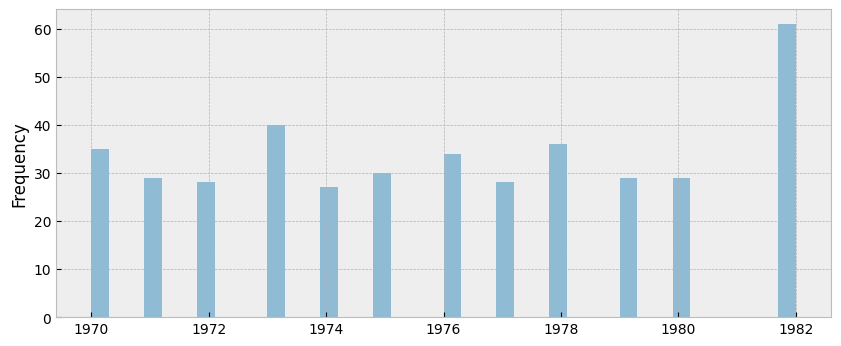

In [ ]:
##msno.matrix(dfAutos04)
## Verificacion de datos perdidos.

plt.figure();
g = dfAutos04.DTYear.plot.hist(alpha = 0.5,
                      figsize=(10, 4),
                      bins=40) # profundidad de las barritas
g

##❖ Histograma con densidad (Curva)

Text(0.5, 1.0, 'Gráfico de Histograma y Densidad')

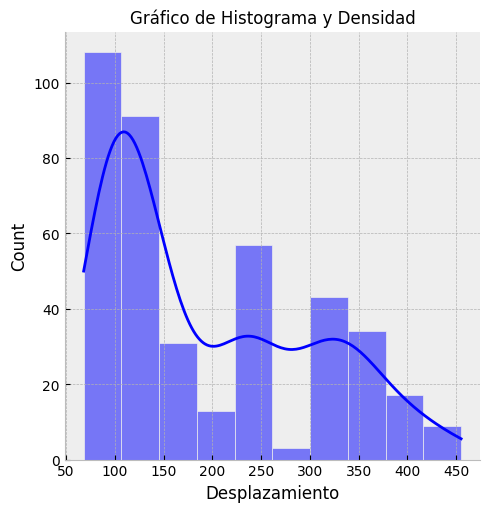

In [ ]:
sns.displot(data=dfAutos04, x="Desplazamiento", kde=True, color="blue")
sns.set(rc={'figure.figsize':(5,7)})
plt.title("Gráfico de Histograma y Densidad")